

*   Nama Peserta   : Nalom Maruli Tua
*   Panggilan      : Nalom
*   Class Dicoding : Belajar Machine Learning untuk Pemula 
*   Tgl Selesai    : 27 Juli 2021
*   Email          : siregarnalom@gmail.com



In [62]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [63]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-27 13:29:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.7MB/s    in 75s     

2021-07-27 13:30:57 (4.09 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [64]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


#membagi data train dan data validation 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dir):
  for name in files:
    full_path.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)


In [65]:
import pandas as pd

In [66]:
df = pd.DataFrame({
    'path': full_path,
    'file_name' : file_name,
    'tag': tag
})
df.groupby(['tag']).size()

tag
paper            712
rock             726
rps-cv-images      1
scissors         750
dtype: int64

In [67]:
df = df.iloc[1:,]

In [68]:
df

,path,file_name,tag
1,/tmp/rockpaperscissors/rps-cv-images/scissors/...,a8DBHodNOhJCxQrN.png,scissors
2,/tmp/rockpaperscissors/rps-cv-images/scissors/...,7M6QmAbgSaXFX9ES.png,scissors
3,/tmp/rockpaperscissors/rps-cv-images/scissors/...,gzAhbz3S2W0VukHE.png,scissors
4,/tmp/rockpaperscissors/rps-cv-images/scissors/...,hP1nFePk6ao9xKDF.png,scissors
5,/tmp/rockpaperscissors/rps-cv-images/scissors/...,NInKk7uh3vNRuwCm.png,scissors
...,...,...,...
2184,/tmp/rockpaperscissors/rps-cv-images/rock/Q7Ej...,Q7EjH9y5ipAktIG6.png,rock
2185,/tmp/rockpaperscissors/rps-cv-images/rock/qT0o...,qT0oCJChnoVWNqC1.png,rock
2186,/tmp/rockpaperscissors/rps-cv-images/rock/GwUj...,GwUjjywvFAhLUYYm.png,rock
2187,/tmp/rockpaperscissors/rps-cv-images/rock/cfyx...,cfyxwMjZmO6RYzLq.png,rock


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df['path']
y = df['tag']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.399, random_state=100)

In [71]:
df_train = pd.DataFrame({
    'path' : X_train,
    'tag' : y_train,
    'set' : 'train'
})

df_val = pd.DataFrame({
    'path' : X_val,
    'tag' : y_val,
    'set' : 'validation'
})

In [72]:
print('train_size',len(df_train))
print('val_size',len(df_val))

train_size 1314
val_size 874


In [73]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_train.append([df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag     
train       paper       430
            rock        449
            scissors    435
validation  paper       282
            rock        277
            scissors    315
dtype: int64 




,path,tag,set
545,/tmp/rockpaperscissors/rps-cv-images/rock/tgpo...,rock,train
1649,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,validation
1370,/tmp/rockpaperscissors/rps-cv-images/paper/raS...,paper,validation


In [74]:
#kita akan merapikan folder dataset

import shutil
from tqdm.notebook import tqdm as tq

In [75]:
datasource_path = "/tmp/rockpaperscissors/rps-cv-images"
dataset_path = "dataset/"


In [76]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [77]:
import tensorflow as tf

In [78]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 10

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [80]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [81]:
# binary = [1,0,0,0,0] [0,1,0,0,0] [0,0,1,0,0] [0,0,0,1,0] [0,0,0,0,1]
# categorical = 1,2,3,4,5

train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('dataset/validation/',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)
num_class = val_generator.num_classes
labels = train_generator.class_indices.keys()

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [82]:
print(labels)

dict_keys(['paper', 'rock', 'scissors'])


In [83]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [84]:
train_data = tf_data_generator(train_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [85]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [86]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Compiling Model.......


In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
activation_6 (Activation)    (None, 150, 150, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 32)      36896     
_________________________________________________________________
activation_7 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 74, 74, 64)       

In [88]:
from tensorflow.keras.applications import MobileNetV2

# get base models
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)

In [89]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

In [90]:
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [91]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [92]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


In [93]:
!pip install -U --pre efficientnet

In [94]:
from efficientnet.tfkeras import EfficientNetB1

In [95]:
# get base models
base_model = EfficientNetB1(
    input_shape=input_shape,
    include_top=False,
    weights='noisy-student',  
    classes=num_class,
)

In [96]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

In [97]:
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [98]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 75, 75, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 75, 75, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 75, 75, 32)   0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [99]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


In [100]:
EPOCH = 2
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/2
83/83 [==============================] - 219s 2s/step - loss: 0.2008 - accuracy: 0.9247 - val_loss: 0.5273 - val_accuracy: 0.8844
Epoch 2/2
83/83 [==============================] - 205s 2s/step - loss: 0.1337 - accuracy: 0.9604 - val_loss: 0.0103 - val_accuracy: 0.9954


In [112]:
import os

In [113]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "rockscissorspapper"
SAVE_MODEL_NAME = "model.projek"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/rockscissorspapper/model.projek...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model/rockscissorspapper/model.projek/assets


In [114]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
# Parameters
input_size = (150,150) # Bisa kalian ganti
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['paper', 'rock', 'scissors']

In [115]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [116]:
from tensorflow.keras.models import load_model

In [118]:
# ada 2 cara load model, jika cara pertama berhasil maka bisa lasngusng di lanjutkan ke fungsi prediksi

MODEL_PATH = 'model/rockscissorspapper/model.projek'
model = load_model(MODEL_PATH,compile=False)

In [124]:
# read image
im = Image.open('dataset/train/rock/01dM3ewPIsnBICu1.png')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

rock 1.0


Saving Gai.jpg to Gai.jpg
scissors 1.0


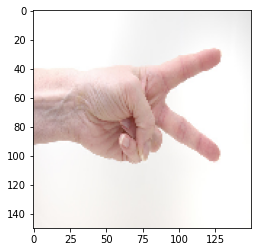

In [133]:
 import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  im = Image.open(path)
  X = preprocess(im,input_size)
  X = reshape([X])
  y = model.predict(X)

  print( labels[np.argmax(y)], np.max(y) )